### New York City Parking Tickets - Analysis

#### Name: Nicolas Bolanos

#### DSC-680 Project - 1

#### Case Study for Ticket Analysis:

The study focuses on the number of tickets given in the year 2021. Data was collected from the New York City Police Department. This analysis allows the user to understand the data given and the large number of tickets given during that year. Unfortunately, there is no quick fix to find a solution for lack of parking-spaces in the city and avoid parking citations.

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 

#### 1: The Basics: 

Reading data from ticket violations.csv. This csv file displays records from 2021 fiscal year. The dataset was retrieved from NYC Open Data and contains records of multiple citations given to drivers from April 01 to November 30, 2020. 

In [3]:
# Import required library
import pandas as pd

# Read data from csv file
df_nyc_tx = pd.read_csv('violations.csv')

In [4]:
df_nyc_tx.head(15)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,4714702166,KGK6659,NY,PAS,11/12/2020,36,4DSD,BMW,V,0,...,GY,NaN,2007,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
1,8793684599,L5232HY,TN,PAS,09/14/2020,21,TRAC,INTER,T,60790,...,WHITE,NaN,0,NaN,0,W,NaN,NaN,NaN,NaN
2,8864757053,BPMN76,FL,PAS,11/25/2020,20,SUBN,NISSA,T,36030,...,BLACK,NaN,0,NaN,0,49,20A-No Parking (Non-COM),NaN,NaN,NaN
3,8778326047,57387MJ,NY,COM,08/20/2020,38,VAN,NaN,T,34430,...,WH,NaN,2016,NaN,0,01,NaN,NaN,NaN,NaN
4,4706640702,M81KFJ,NJ,PAS,09/09/2020,36,UT,TOYOT,V,0,...,NaN,NaN,2002,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
5,4708208868,KDW9420,NY,PAS,09/21/2020,36,4DSD,INFIN,V,0,...,BK,NaN,2017,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
6,8818510060,HLB4150,NY,PAS,07/14/2020,20,SUBN,HONDA,T,83630,...,GY,NaN,2008,NaN,0,W,NaN,NaN,NaN,NaN
7,4702592464,HLG2917,NY,PAS,08/10/2020,36,2DSD,HONDA,V,0,...,BK,NaN,2016,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
8,8835406699,KDK9499,NY,PAS,11/12/2020,74,SEDN,HONDA,T,54650,...,GREY,NaN,2008,NaN,0,03,74-Missing Display Plate,NaN,NaN,NaN
9,8866901556,HKD8701,NY,PAS,10/26/2020,38,PICK,TOYOT,T,16910,...,WH,NaN,2016,NaN,0,35,NaN,NaN,NaN,NaN


In [5]:
df_nyc_tx.tail(15)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
49985,4706668610,GZJ7545,NY,PAS,09/09/2020,36,SUBN,JEEP,V,0,...,GY,NaN,2015,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
49986,4713886415,KEN5016,NY,PAS,11/09/2020,36,SUBN,ACURA,V,0,...,BK,NaN,2020,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
49987,4712042266,HPZ2284,NY,PAS,10/21/2020,36,SUBN,HONDA,V,0,...,BK,NaN,2017,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
49988,8623573213,76723MK,NY,COM,07/29/2020,19,DELV,KENWO,T,10010,...,RD,NaN,2011,NaN,0,55,NaN,NaN,NaN,NaN
49989,8607808163,JRD2849,NY,PAS,10/02/2020,21,4DSD,NISSA,T,28380,...,BK,NaN,2018,NaN,0,19,NaN,NaN,NaN,NaN
49990,8858451405,JCJ6234,NY,PAS,11/13/2020,38,SUBN,CHRYS,T,6680,...,MR,NaN,2018,NaN,0,01,38-Failure to Dsplay Meter Rec,NaN,NaN,NaN
49991,8810385305,GYP9287,NY,PAS,10/05/2020,38,SUBN,ME/BE,T,39350,...,BK,NaN,2010,NaN,0,CC1,NaN,NaN,NaN,NaN
49992,4698978658,HXL2781,NY,PAS,07/15/2020,36,SUBN,ACURA,V,0,...,GY,NaN,2018,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
49993,8679445125,JBB9580,NY,PAS,09/16/2020,31,SUBN,AUDI,T,26790,...,BK,NaN,2011,NaN,0,087,NaN,NaN,NaN,NaN
49994,8875951779,JLJ4585,NY,PAS,11/17/2020,21,4DSD,MITSU,T,57090,...,BLACK,NaN,2017,NaN,0,W,21-No Parking (street clean),NaN,NaN,NaN


In [6]:
# Displaying the shape or contents of dataset
df_nyc_tx.shape

(50000, 43)

In [7]:
# Explore dataset via describe
df_nyc_tx.describe

<bound method NDFrame.describe of        Summons Number Plate ID Registration State Plate Type  Issue Date  \
0          4714702166  KGK6659                 NY        PAS  11/12/2020   
1          8793684599  L5232HY                 TN        PAS  09/14/2020   
2          8864757053   BPMN76                 FL        PAS  11/25/2020   
3          8778326047  57387MJ                 NY        COM  08/20/2020   
4          4706640702   M81KFJ                 NJ        PAS  09/09/2020   
...               ...      ...                ...        ...         ...   
49995      4014245755  JPN4910                 NY        PAS  06/25/2020   
49996      8794437506   174ZYG                 CT        PAS  08/25/2020   
49997      8849769581  HES6895                 NY        PAS  11/03/2020   
49998      8755448173  63035MN                 NY        COM  08/19/2020   
49999      8581527528  AW74165                 CT        PAS  08/06/2020   

       Violation Code Vehicle Body Type Vehicle Make 

In [8]:
# Method prints basic information about Dataset
df_nyc_tx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Summons Number                     50000 non-null  int64  
 1   Plate ID                           50000 non-null  object 
 2   Registration State                 50000 non-null  object 
 3   Plate Type                         50000 non-null  object 
 4   Issue Date                         50000 non-null  object 
 5   Violation Code                     50000 non-null  int64  
 6   Vehicle Body Type                  49855 non-null  object 
 7   Vehicle Make                       49864 non-null  object 
 8   Issuing Agency                     50000 non-null  object 
 9   Street Code1                       50000 non-null  int64  
 10  Street Code2                       50000 non-null  int64  
 11  Street Code3                       50000 non-null  int

In [9]:
# Convert 'Issue Date' data type to 'date'
df_nyc_tx['Issue Date'] = pd.to_datetime(df_nyc_tx['Issue Date'])

In [10]:
# Checking for previous changes to take effect
df_nyc_tx.head(5)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,4714702166,KGK6659,NY,PAS,2020-11-12,36,4DSD,BMW,V,0,...,GY,NaN,2007,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
1,8793684599,L5232HY,TN,PAS,2020-09-14,21,TRAC,INTER,T,60790,...,WHITE,NaN,0,NaN,0,W,NaN,NaN,NaN,NaN
2,8864757053,BPMN76,FL,PAS,2020-11-25,20,SUBN,NISSA,T,36030,...,BLACK,NaN,0,NaN,0,49,20A-No Parking (Non-COM),NaN,NaN,NaN
3,8778326047,57387MJ,NY,COM,2020-08-20,38,VAN,NaN,T,34430,...,WH,NaN,2016,NaN,0,01,NaN,NaN,NaN,NaN
4,4706640702,M81KFJ,NJ,PAS,2020-09-09,36,UT,TOYOT,V,0,...,NaN,NaN,2002,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN


#### 2: Exploratory Data Analysis: 

Identifying invalid data is important in this step to avoid any false-positives results. The code below removes rows and then prints valid rows from the dataset. 

The following variables will be noted as invalid: 
- Registration State:Values indentified as a two letter state or province identifier
- Plate Type: Values identified as a three letter-registration-class code
- Issue Date: Dates out of the scope of 2021 and those witout the proper format
- Violation Code: Values identified as Not a Number (NaN)
- Vehicle Make: Blank Values
- Vehicle Time: Blank Values
- Vehicle Year: Only 2020 

In [11]:
# Cleaning rows from invalid data
df_nyc_tx = df_nyc_tx[(df_nyc_tx['Registration State'] != "99") & (df_nyc_tx['Plate Type'] != "999") & (df_nyc_tx['Issue Date'] >= '2020-04-01')
                 & (df_nyc_tx['Issue Date'] <= '2020-11-30') & (df_nyc_tx['Violation Code'] != 0) & (df_nyc_tx['Vehicle Make'].notnull())
                 & (df_nyc_tx['Violation Time'].notnull()) & (df_nyc_tx['Vehicle Year'] != 0) & (df_nyc_tx['Vehicle Year'] <= 2020)]


# Display rows after cleaning dataset
print('Number of Rows: ' + str(len(df_nyc_tx)))

Number of Rows: 38937


#### 3: Display a Graphical Representation of parking violations issued for each vehicle and year

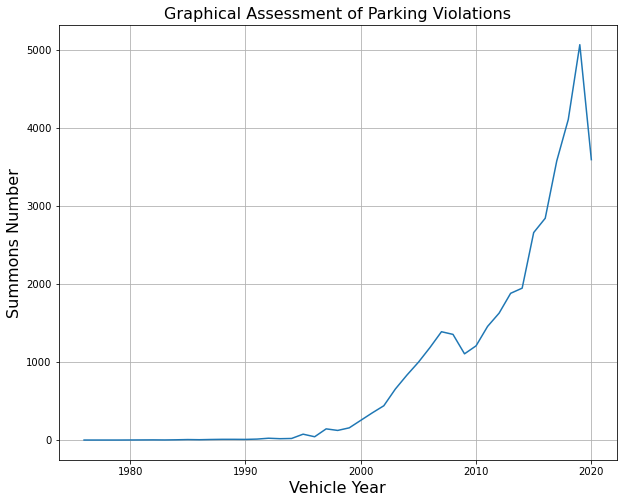

In [12]:
# Import required library

import matplotlib.pyplot as plt

# Use GroupBy method to use with plot
df_nyc_tx_vehicle_year= df_nyc_tx.groupby('Vehicle Year')['Summons Number'].count()

# Plot shows number of Parking Violations issued for each vehicle year
plt.figure(figsize=(10, 8))

plt.xlabel('Vehicle Year',fontsize=16)
plt.ylabel('Summons Number',fontsize=16)

plt.grid(True)

plt.title('Graphical Assessment of Parking Violations', fontsize=16)




plt.plot(df_nyc_tx_vehicle_year)
plt.show()

#### 4: Identify the top 20 violation codes for vehicles that are registered outside the New York State.

In [13]:
df_nyc_tx[df_nyc_tx['Registration State'] != 'NY'].groupby('Violation Code')['Summons Number'].count().nlargest(20).reset_index(name='Count')

,Violation Code,Count
0,36,2772
1,5,365
2,7,350
3,12,62
4,21,30
5,40,16
6,98,12
7,46,8
8,14,4
9,19,3


#### 5: Identifying Locations for most parking violations received per vehicle manufacturer

In [14]:
df_nyc_tx.head(10)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,4714702166,KGK6659,NY,PAS,2020-11-12,36,4DSD,BMW,V,0,...,GY,NaN,2007,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
4,4706640702,M81KFJ,NJ,PAS,2020-09-09,36,UT,TOYOT,V,0,...,NaN,NaN,2002,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
5,4708208868,KDW9420,NY,PAS,2020-09-21,36,4DSD,INFIN,V,0,...,BK,NaN,2017,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
6,8818510060,HLB4150,NY,PAS,2020-07-14,20,SUBN,HONDA,T,83630,...,GY,NaN,2008,NaN,0,W,NaN,NaN,NaN,NaN
7,4702592464,HLG2917,NY,PAS,2020-08-10,36,2DSD,HONDA,V,0,...,BK,NaN,2016,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
8,8835406699,KDK9499,NY,PAS,2020-11-12,74,SEDN,HONDA,T,54650,...,GREY,NaN,2008,NaN,0,03,74-Missing Display Plate,NaN,NaN,NaN
9,8866901556,HKD8701,NY,PAS,2020-10-26,38,PICK,TOYOT,T,16910,...,WH,NaN,2016,NaN,0,35,NaN,NaN,NaN,NaN
10,4707750461,H79JVD,NJ,PAS,2020-09-17,36,UT,BMW,V,0,...,NaN,NaN,2018,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
11,8832726385,JCF5728,NY,PAS,2020-11-21,14,SUBN,CHEVR,T,12520,...,GY,NaN,2006,NaN,0,015,14-No Standing,NaN,NaN,NaN
12,5112547674,919NR4,MA,PAS,2020-10-30,7,SD,BMW,V,0,...,NaN,NaN,2018,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN


In [15]:
# Code looks up Toyota and location of given citation 
df_nyc_tx[df_nyc_tx['Vehicle Make'] == 'TOYOT'].groupby('Street Name')['Summons Number'].count().nlargest(20).reset_index(name='Count')

,Street Name,Count
0,EB W 14TH STREET @ 5,39
1,WB CONDUIT BLVD @ LI,39
2,Broadway,38
3,WB QUEENS BLVD @ 72N,31
4,NB WEST ST @ LEROY S,28
5,37th Ave,26
6,EB HORACE HARDING EX,23
7,WB SEDGWICK AVE @ SA,22
8,3rd Ave,21
9,Jamaica Ave,20


In [16]:
# Code looks up Honda and location of given citation 
df_nyc_tx[df_nyc_tx['Vehicle Make'] == 'HONDA'].groupby('Street Name')['Summons Number'].count().nlargest(20).reset_index(name='Count')

,Street Name,Count
0,Broadway,34
1,WB CONDUIT BLVD @ LI,31
2,WB QUEENS BLVD @ 72N,29
3,NB WEST ST @ LEROY S,25
4,EB W 14TH STREET @ 5,23
5,Queens Blvd,23
6,5th Ave,20
7,Jamaica Ave,20
8,37th Ave,19
9,EB ATLANTIC AVE @ 13,18


In [17]:
# Code looks up bmw and location of given citation 
df_nyc_tx[df_nyc_tx['Vehicle Make'] == 'BMW'].groupby('Street Name')['Summons Number'].count().nlargest(20).reset_index(name='Count')

,Street Name,Count
0,WB QUEENS BLVD @ 72N,16
1,EB W 14TH STREET @ 5,15
2,WB CONDUIT BLVD @ LI,13
3,Broadway,12
4,EB HORACE HARDING EX,11
5,3rd Ave,10
6,NB SPRINGFIELD BLVD,10
7,WB LINDEN BLVD @ LIN,9
8,EB NORTHERN BLVD @ A,8
9,Lexington Ave,8


In [18]:
# Code looks up chevrolet and location of given citation 
df_nyc_tx[df_nyc_tx['Vehicle Make'] == 'CHEVR'].groupby('Street Name')['Summons Number'].count().nlargest(20).reset_index(name='Count')

,Street Name,Count
0,Broadway,34
1,3rd Ave,24
2,5th Ave,17
3,Amsterdam Ave,15
4,Madison Ave,15
5,EB W 14TH STREET @ 5,14
6,WB CONDUIT BLVD @ LI,14
7,WB E 14TH STREET @ I,14
8,Lexington Ave,13
9,1st Ave,12


In [19]:
# Code looks up infinity and location of given citation 
df_nyc_tx[df_nyc_tx['Vehicle Make'] == 'INFIN'].groupby('Street Name')['Summons Number'].count().nlargest(20).reset_index(name='Count')

,Street Name,Count
0,WB CONDUIT BLVD @ LI,12
1,WB QUEENS BLVD @ 72N,7
2,EB ATLANTIC AVE @ ES,6
3,EB HORACE HARDING EX,5
4,NB PAGE AVE @ ACADEM,5
5,WB LINDEN BLVD @ LIN,5
6,WB LINDEN BLVD @ ROC,5
7,EB ATLANTIC AVE @ 13,4
8,EB E GUN HILL RD @ T,4
9,EB W 14TH STREET @ 5,4


#### 6: Identifying New York City vehicles and plotting results in a graph

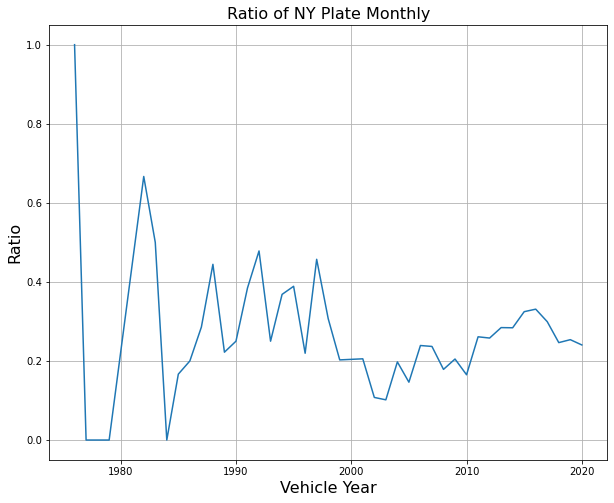

In [20]:
# Set up code to show Registration State is NY.
df_nyc_tx_plot = df_nyc_tx[df_nyc_tx['Registration State'] == 'NY']

# Calculate the ratio of non-passenger plates to all plates, grouped by year. 
df_ny_notpas_one = df_nyc_tx_plot[df_nyc_tx_plot['Plate Type'] != 'PAS'].groupby('Vehicle Year')['Summons Number'].count()
df_ny_all_Rtls = df_nyc_tx_plot.groupby('Vehicle Year')['Summons Number'].count()
ratio = df_ny_notpas_one / df_ny_all_Rtls

plt.figure(figsize=(10, 8))



# Plot format
plt.xlabel('Vehicle Year',fontsize=16)
plt.ylabel('Ratio',fontsize=16)

plt.grid(True)

plt.title('Ratio of NY Plate Monthly', fontsize=16)




# Replace nulls with 0.
ratio.fillna(0, inplace = True)

# Create and show plot.
plt.plot(ratio)
plt.show()

#### 7: Identifying Personal Vehicle License Plates vs. Commercial License Plates Issued Citations

Using the Plate Type and Vehicle Color to understand and compare which type of motor vehicle has the hightest number of citations or tickets. 

In [21]:
# Private Own Vehicles' count of tickets based on vehicle color.
df_nyc_tx[df_nyc_tx['Plate Type'] == 'PAS'].groupby('Vehicle Color')['Summons Number'].count().nlargest(20).reset_index(name='Count')

,Vehicle Color,Count
0,GY,7797
1,BK,6413
2,WH,4696
3,BL,2489
4,RD,1464
5,GR,503
6,BLACK,393
7,TN,368
8,WHITE,332
9,BR,309


In [22]:
# Commercial Vehicles' count of tickets based on vehicle color.

df_nyc_tx[df_nyc_tx['Plate Type'] == 'COM'].groupby('Vehicle Color')['Summons Number'].count().nlargest(20).reset_index(name='Count')

,Vehicle Color,Count
0,WH,2882
1,WHITE,976
2,BROWN,953
3,GY,230
4,BL,186
5,BK,169
6,RD,139
7,GR,29
8,BR,27
9,YW,27


#### 8. Identifying the number of tickets issued to motor vehicles from out of State vs. The average of parking violations 

At this point, the main objective is to identify by numbers which State is at the top other than New York State registered vehicles. The next step is to find the average of parking violations from those motor vehicles registered outside of the State of New York. 

In [23]:
# Identify Number of Vehicles issued tickets from out of State
print('Motor Vehicles Issued Parking Tickets Which are Registered outside New York State: ' +str(df_nyc_tx['Registration State'].nunique()))

Motor Vehicles Issued Parking Tickets Which are Registered outside New York State: 45


In [24]:
# Identify Average of Parking Violations
print('The Average of Parking Tickets given to non-registered New York State Vehicles: ' + str(df_nyc_tx.groupby('Registration State')['Summons Number'].count().mean()))

The Average of Parking Tickets given to non-registered New York State Vehicles: 865.2666666666667


#### 9. Identify the Plate Type with the highest Parking Tickets per Violation Code

Here, It is important to understand which plate type (Commercial, Personal Own Vehicle, or Other) have the hightest numbers of parking tickets given. 

In [25]:
#pd.options.display.max_columns = None

#pd.options.display.max_rows = None

In [26]:
# Applying Groupby method to acquire the numbers of each type of motor vehicle
df_nyc_tx.groupby('Violation Code')['Plate Type'].apply(lambda x: x.value_counts().head(20)).reset_index(name='Count')

,Violation Code,level_1,Count
0,4,COM,4
1,4,PAS,3
2,5,PAS,1080
3,5,OMT,214
4,5,COM,99
...,...,...,...
375,98,PAS,92
376,98,OMT,4
377,98,COM,1
378,98,SRF,1


#### 10. Identify the Percentage of Parking Tickets in each county and print results in descending order

In [27]:
# Count the number of parking tickets by county
df_nyTx_county = df_nyc_tx.groupby('Violation County')['Summons Number'].count().reset_index(name='Percentage')

# Calculate the number of parking violations in each county in percentages of total parking tickets
df_nyTx_county['Percentage'] = df_nyTx_county['Percentage'] / df_nyTx_county['Percentage'].sum() * 100


# Print Results
df_nyTx_county.sort_values(by='Percentage', ascending=False).reset_index(drop=True)

,Violation County,Percentage
0,NY,20.769903
1,BK,15.104917
2,QN,13.734314
3,BX,13.371734
4,K,13.104300
5,Q,12.983440
6,MN,6.912158
7,ST,3.342934
8,R,0.676301


#### 11. Graphical Analysis of Parking Tickets by Plate/Vehicle Type 

C:\Users\Nicol\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


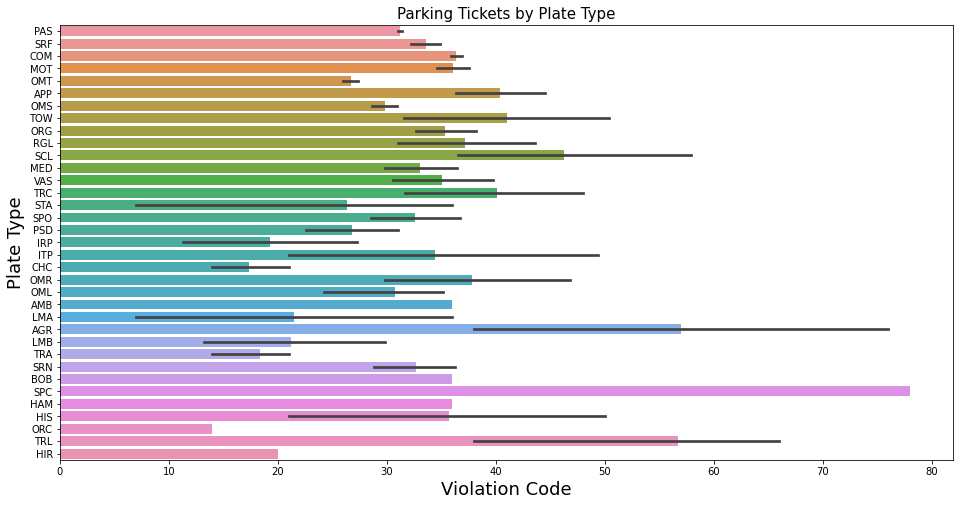

In [28]:
pdDF = df_nyc_tx
import seaborn as sns
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Violation Code', y='Plate Type', data=pdDF)


ax.set_ylabel("Plate Type", fontsize=18);
ax.set_title('Parking Tickets by Plate Type',fontsize=15)
ax.set_xlabel("Violation Code", fontsize=18);


plt.show()

#### 12. Graphical Analysis of Parking Tickets by County in New York State

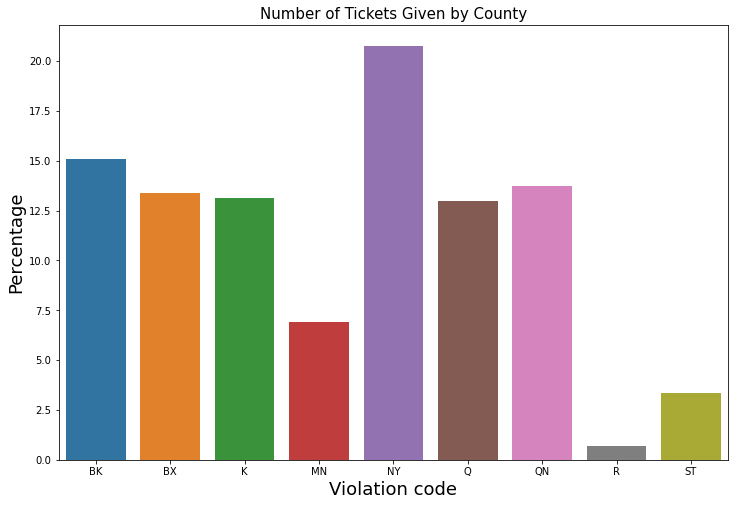

In [36]:
pdDF = df_nyTx_county
import seaborn as sns
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Violation County', y='Percentage', data=df_nyTx_county)

ax.set_ylabel("Percentage", fontsize=18);
ax.set_title('Number of Tickets Given by County',fontsize=15)
ax.set_xlabel("Violation code", fontsize=18);


plt.show()

In [31]:
# Import required library
import pandas as pd

# Read data from csv file
df_nyc_tx = pd.read_csv('violations.csv')

In [32]:
df_nyc_tx.head(5)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,4714702166,KGK6659,NY,PAS,11/12/2020,36,4DSD,BMW,V,0,...,GY,NaN,2007,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
1,8793684599,L5232HY,TN,PAS,09/14/2020,21,TRAC,INTER,T,60790,...,WHITE,NaN,0,NaN,0,W,NaN,NaN,NaN,NaN
2,8864757053,BPMN76,FL,PAS,11/25/2020,20,SUBN,NISSA,T,36030,...,BLACK,NaN,0,NaN,0,49,20A-No Parking (Non-COM),NaN,NaN,NaN
3,8778326047,57387MJ,NY,COM,08/20/2020,38,VAN,NaN,T,34430,...,WH,NaN,2016,NaN,0,01,NaN,NaN,NaN,NaN
4,4706640702,M81KFJ,NJ,PAS,09/09/2020,36,UT,TOYOT,V,0,...,NaN,NaN,2002,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN


In [33]:
# Total of Violation Description plus total of each
df_nyc_tx['Violation Description']. value_counts().head(10)

PHTO SCHOOL ZN SPEED VIOLATION    14422
FAILURE TO STOP AT RED LIGHT       1692
BUS LANE VIOLATION                 1435
21-No Parking (street clean)        814
38-Failure to Dsplay Meter Rec      707
14-No Standing                      521
40-Fire Hydrant                     452
20A-No Parking (Non-COM)            320
MOBILE BUS LANE VIOLATION           308
37-Expired Parking Meter            209
Name: Violation Description, dtype: int64

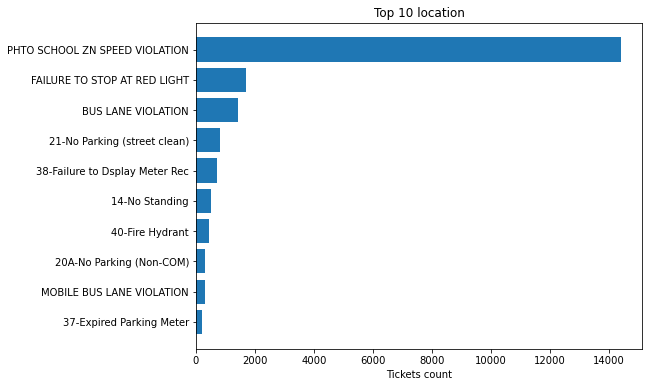

In [35]:
# Plot of Top 10 location of tickets count

plot_df = df_nyc_tx['Violation Description'].value_counts().head(10)[::-1]
plt.figure(figsize=(8,6))
plt.barh(plot_df.index, plot_df.values)
plt.xlabel('Tickets count')
plt.title('Top 10 location')
plt.show()